In [1]:
import pandas as pd
import os

In [2]:
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))
DATA_DIR = os.path.join(BASE_DIR, "data", "processed")

file_name = "Propensity_clean_v1.csv"  # Cambia a "v2", "v3", "v4" si es necesario
file_path = os.path.join(DATA_DIR, file_name)

df = pd.read_csv(file_path)

Criterion: gini, n_estimators: 600, Max Depth: 10, Min Samples Split: 5, Min Samples Leaf: 2, Bootstrap: True
Accuracy: 0.8211, F1 Score: 0.8183, Recall: 0.8211, ROC-AUC: 0.9073915629083283, CV Score: 0.8235, Train Score: 0.8534, Overfitting: OK

Criterion: gini, n_estimators: 600, Max Depth: 10, Min Samples Split: 5, Min Samples Leaf: 2, Bootstrap: True
Accuracy: 0.8211, F1 Score: 0.8183, Recall: 0.8211, ROC-AUC: 0.9073915629083283, CV Score: 0.8235, Train Score: 0.8534, Overfitting: OK

Criterion: gini, n_estimators: 600, Max Depth: 10, Min Samples Split: 5, Min Samples Leaf: 3, Bootstrap: True
Accuracy: 0.8183, F1 Score: 0.8154, Recall: 0.8183, ROC-AUC: 0.9069730715220689, CV Score: 0.8243, Train Score: 0.8526, Overfitting: OK

Criterion: gini, n_estimators: 600, Max Depth: 10, Min Samples Split: 5, Min Samples Leaf: 3, Bootstrap: True
Accuracy: 0.8183, F1 Score: 0.8154, Recall: 0.8183, ROC-AUC: 0.9069730715220689, CV Score: 0.8243, Train Score: 0.8526, Overfitting: OK

Criterion: g

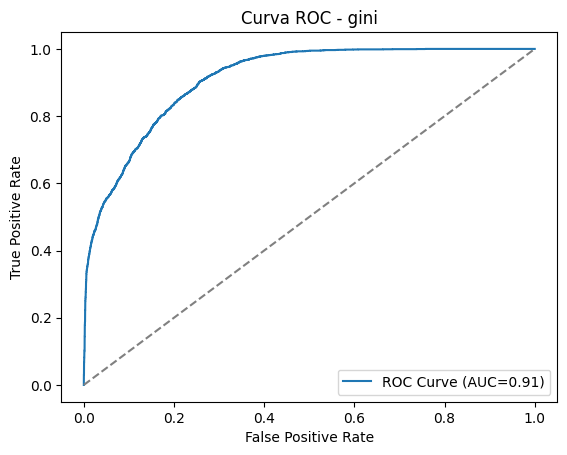

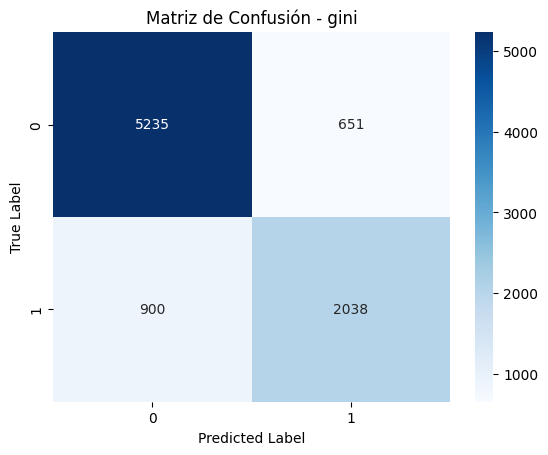


--------------------------------------------------
Modelo Optimizado 22
--------------------------------------------------
Criterion: gini, n_estimators: 600, Max Depth: 12, Min Samples Split: 5, Min Samples Leaf: 3

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      5886
           1       0.76      0.69      0.72      2938

    accuracy                           0.82      8824
   macro avg       0.81      0.79      0.80      8824
weighted avg       0.82      0.82      0.82      8824


ROC-AUC Score: 0.9114879441866535



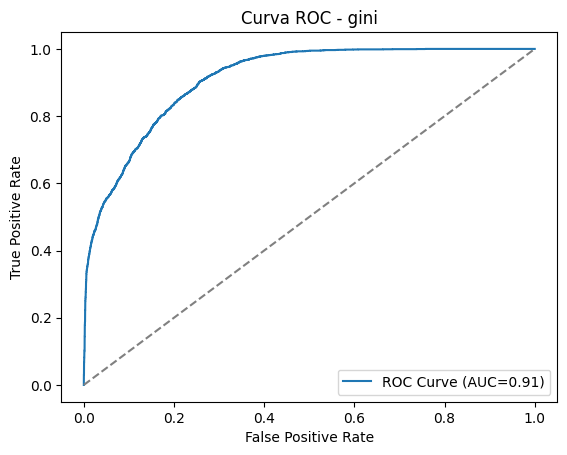

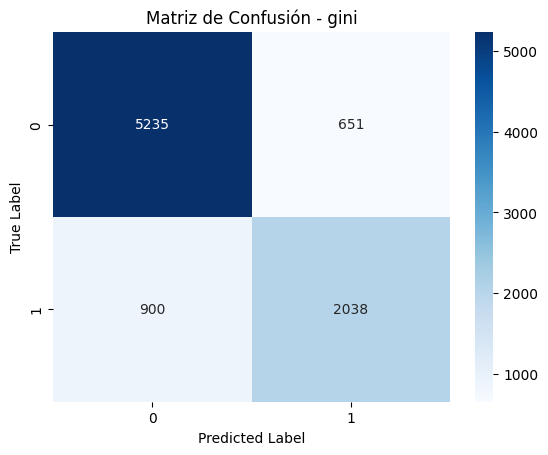


--------------------------------------------------
Modelo Optimizado 19
--------------------------------------------------
Criterion: gini, n_estimators: 600, Max Depth: 12, Min Samples Split: 5, Min Samples Leaf: 2

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      5886
           1       0.76      0.69      0.72      2938

    accuracy                           0.82      8824
   macro avg       0.81      0.79      0.80      8824
weighted avg       0.82      0.82      0.82      8824


ROC-AUC Score: 0.9114879441866535



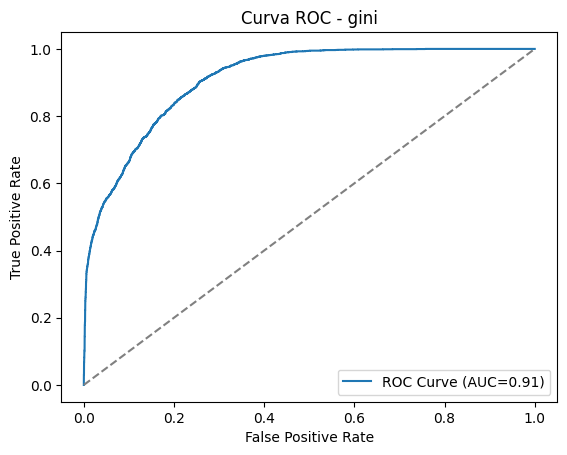

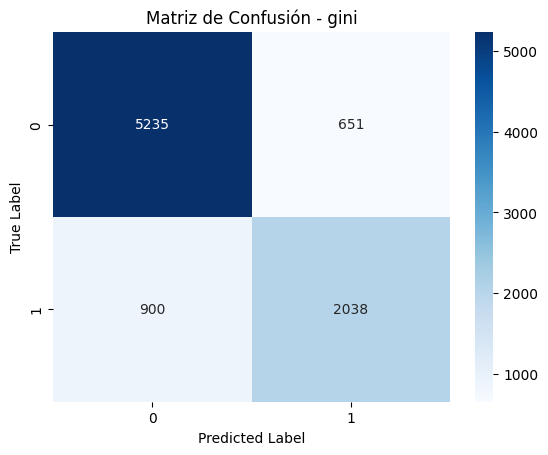

,criterion,n_estimators,max_depth,min_samples_split,min_samples_leaf,bootstrap,max_features,accuracy,f1_score,recall,roc_auc,cv_score,train_score,overfitting
20,gini,600,12,5,3,True,sqrt,0.825589,0.823335,0.825589,0.912788,0.827284,0.877603,OK
21,gini,600,12,5,3,True,log2,0.825589,0.823335,0.825589,0.912788,0.827284,0.877603,OK
18,gini,600,12,5,2,True,sqrt,0.825589,0.823168,0.825589,0.913122,0.828134,0.880748,OK


In [3]:
import os
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, precision_recall_curve

# 📌 1️⃣ Cargar los datos (asumiendo que ya lo tienes cargado en df)
# Eliminar la columna "Tiempo" (si existe)
df = df.drop(columns=["Tiempo"], errors="ignore")

# 📌 2️⃣ Definir X e y
y = df["Mas_1_coche"]
X = df.drop(columns=["Mas_1_coche"])

# 📌 3️⃣ Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 📌 4️⃣ Definir hiperparámetros a iterar
param_grid = {
    'criterion': ['gini', 'entropy'],  # Función de impureza
    'n_estimators': [ 600],  # Número de árboles
    'max_depth': [ 10,12],  # Profundidad máxima
    'min_samples_split': [5, 10, 20],  # Mínimas muestras para dividir un nodo
    'min_samples_leaf': [2, 3, 5],  # Mínimas muestras en hojas
    'bootstrap': [True],  # Usar muestreo con reemplazo
    'max_features': ['sqrt','log2'],  # Selección de características en cada split
}

"""Explicación de hiperparámetros:
- `criterion`: Forma de calcular la impureza del árbol. 'gini' y 'entropy' son comunes.
- `n_estimators`: Más árboles pueden reducir la varianza pero aumentan el tiempo de cómputo.
- `max_depth`: Limitar la profundidad evita sobreajuste.
- `min_samples_split`: Controla cuándo un nodo se divide.
- `min_samples_leaf`: Evita que haya nodos con muy pocos datos.
- `bootstrap`: Permite el muestreo con reemplazo para robustez.
- `max_features`: Usa la raíz cuadrada del total de features para cada split, acelerando el modelo.
"""

# 📌 5️⃣ Almacenar resultados
results = []

# 📌 6️⃣ Iterar sobre todas las combinaciones de hiperparámetros
for params in product(*param_grid.values()):
    criterion, n_estimators, max_depth, min_samples_split, min_samples_leaf, bootstrap, max_features = params

    # 📌 7️⃣ Construir el modelo con los hiperparámetros actuales
    model = RandomForestClassifier(
        criterion=criterion,
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        bootstrap=bootstrap,
        max_features=max_features,
        n_jobs=-1,  # Paralelización
        random_state=42
    )

    # 📌 8️⃣ Entrenar el modelo
    model.fit(X_train, y_train)

    # 📌 9️⃣ Predecir en el conjunto de prueba
    y_pred = model.predict(X_test)

    # 📌 🔟 Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)

    # 📌 🔢 Calcular ROC-AUC si hay más de una clase
    if len(np.unique(y_test)) > 1:
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
    else:
        roc_auc = None

    # 📌 🔄 Validación cruzada
    cv_scores = cross_val_score(model, X_train, y_train, cv=7, n_jobs=-1)
    mean_cv_score = np.mean(cv_scores)

    # 📌 🏆 Calcular Train Score
    train_score = model.score(X_train, y_train)

    # 📌 🚨 Determinar si hay sobreajuste
    if train_score > 1.5 * mean_cv_score:
        overfitting_warning = "SEVERE OVERFITTING"
    elif train_score > 1.2 * mean_cv_score:
        overfitting_warning = "DANGER"
    elif train_score > 1.1 * mean_cv_score:
        overfitting_warning = "MILD OVERFITTING"
    else:
        overfitting_warning = "OK"

    # 📌 Guardar los resultados
    results.append({
        'criterion': criterion,
        'n_estimators': n_estimators,
        'max_depth': int(max_depth) if pd.notna(max_depth) else None,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'bootstrap': bootstrap,
        'max_features': max_features,
        'accuracy': accuracy,
        'f1_score': f1,
        'recall': recall,
        'roc_auc': roc_auc,
        'cv_score': mean_cv_score,
        'train_score': train_score,
        'overfitting': overfitting_warning
    })

    # 📌 Mostrar resultados parciales
    print(f"Criterion: {criterion}, n_estimators: {n_estimators}, Max Depth: {max_depth}, Min Samples Split: {min_samples_split}, Min Samples Leaf: {min_samples_leaf}, Bootstrap: {bootstrap}")
    print(f"Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}, Recall: {recall:.4f}, ROC-AUC: {roc_auc}, CV Score: {mean_cv_score:.4f}, Train Score: {train_score:.4f}, Overfitting: {overfitting_warning}\n")

# 📌 1️⃣1️⃣ Convertir resultados a DataFrame y seleccionar los mejores modelos
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by=['f1_score', 'accuracy'], ascending=False)

# 📌 1️⃣2️⃣ Seleccionar los mejores 3 modelos sin sobreajuste
best_models = results_df[results_df['overfitting'] == 'OK'].head(3)

# 📌 1️⃣3️⃣ Mostrar los mejores modelos con detalles
for index, row in best_models.iterrows():
    print('\n' + '-' * 50)
    print(f'Modelo Optimizado {index + 1}')
    print('-' * 50)
    print(f'Criterion: {row["criterion"]}, n_estimators: {row["n_estimators"]}, Max Depth: {row["max_depth"]}, Min Samples Split: {row["min_samples_split"]}, Min Samples Leaf: {row["min_samples_leaf"]}')
    print(f'\nClassification Report:')
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

    if len(np.unique(y_test)) > 1:
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        print(f'\nROC-AUC Score: {roc_auc}\n')

        # 📌 Curva ROC
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        plt.figure()
        plt.plot(fpr, tpr, label=f"ROC Curve (AUC={roc_auc:.2f})")
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Curva ROC - {row["criterion"]}')
        plt.legend()
        plt.show()

        # 📌 Matriz de confusión
        plt.figure()
        sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title(f'Matriz de Confusión - {row["criterion"]}')
        plt.show()

# 📌 Mostrar los mejores modelos
from IPython.display import display
display(best_models)